# Data Mining

*First Assignment*

For the irst Data Mining course assignment you should implement all
statistical theory which you know in a practical problem.

Dataset of customers of a chain grocery stores.

Sales team wants to send some customized o ers to their customers which suits best to them.

There are many features in this dataset which describe a speci ic customer.

The dataset’s name is “marketing_campaign.csv”.

In this step, you should follow your statistical knowledge to preprocess this dataset.

In [83]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 KB 485.3 kB/s eta 0:00:0000:0100:01


In [153]:
import numpy as np
import datetime as DT
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [9]:
# Load Data
df = pd.read_csv('marketing_campaign.csv')
print(df[0:2]) 

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  

[2 rows x 27 columns]


In [12]:
# Check the shape of the data
print(df.shape)

(2240, 27)


In [13]:
# Observe first five rows
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [15]:
# Observe last five rows
df.head(-5)
#or
df.tail(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,1,4,7,0,0,0,0,0,0,1


In [18]:
# Check data integrity and print missing values of each column
if df.isna().sum().sum() != 0 :
    print("Lack of integrity")
	
df.isna().sum()    

Lack of integrity


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [24]:
# Drop “ID” column as a not useful feature
df.drop('ID', inplace=True, axis=1)
print(df)


      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0     04-09-2012       

In [58]:
# Summary statistics of numerical variables
# here only for 'Income'
from statistics import mode,median
print('mean : {}'.format(np.mean(df['Income'])))
print('median : {}'.format(np.nanmedian(df['Income'])))
print('mode : {}'.format(mode(df['Income'])))
print('min : {}'.format(np.min(df['Income'])))
print('max : {}'.format(np.max(df['Income'])))
print('Q1 : {}'.format(np.nanpercentile(df['Income'], 25, axis=0)))
print('Q2 : {}'.format(np.nanpercentile(df['Income'], 75, axis=0)))


mean : 52247.25135379061
median : 51381.5
mode : 7500.0
min : 1730.0
max : 666666.0
Q1 : 35303.0
Q2 : 68522.0


In [59]:
# Explore more in all categorical variables and unique observations in each category
for col in df.columns:
    print('categories name  : {}'.format(df[col].unique()))
    print('count of every category : {}'.format(df[col].value_counts()))

categories name  : [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
count of every category : 1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name:

In [61]:
# Replace “2n Cycle” with “Master” in “Education” column
df['Education'].replace('2n Cycle', 'Master')

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2235    Graduation
2236           PhD
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2240, dtype: object

In [64]:
# Replace [“Alone”, “Absurd”, “YOLO”] with “Single” in “Martial_Status”column
df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2240, dtype: object

(array([20., 22., 25., 26., 23., 48., 34., 37., 44., 39., 56., 39., 58.,
        53., 66., 62., 46., 46., 62., 44., 57., 46., 44., 53., 44., 41.,
        59., 50., 50., 40., 46., 59., 46., 58., 56., 44., 54., 59., 32.,
        43., 37., 45., 41., 44., 41., 28., 21., 15., 10., 13.]),
 array([14421.  , 15946.32, 17471.64, 18996.96, 20522.28, 22047.6 ,
        23572.92, 25098.24, 26623.56, 28148.88, 29674.2 , 31199.52,
        32724.84, 34250.16, 35775.48, 37300.8 , 38826.12, 40351.44,
        41876.76, 43402.08, 44927.4 , 46452.72, 47978.04, 49503.36,
        51028.68, 52554.  , 54079.32, 55604.64, 57129.96, 58655.28,
        60180.6 , 61705.92, 63231.24, 64756.56, 66281.88, 67807.2 ,
        69332.52, 70857.84, 72383.16, 73908.48, 75433.8 , 76959.12,
        78484.44, 80009.76, 81535.08, 83060.4 , 84585.72, 86111.04,
        87636.36, 89161.68, 90687.  ]),
 <BarContainer object of 50 artists>)

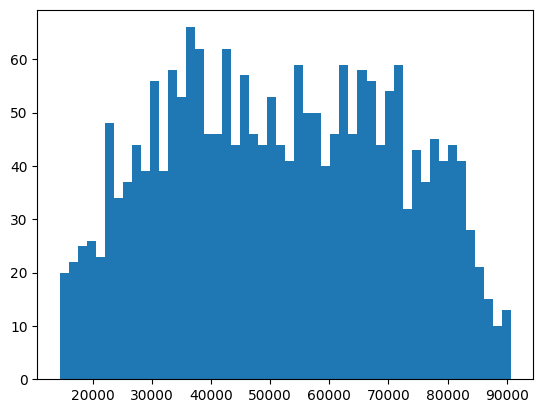

In [81]:
# Plot histogram and box-plot of customers Income and detect outliers visually
plt.hist(df['Income'], bins=50)

(array([21., 24., 24., 20., 46., 37., 31., 44., 36., 40., 52., 38., 58.,
        53., 52., 65., 39., 43., 61., 40., 52., 44., 41., 49., 46., 40.,
        49., 44., 47., 46., 41., 46., 52., 43., 57., 53., 35., 52., 50.,
        43., 30., 49., 37., 36., 42., 37., 37., 25., 19., 16.]),
 array([16185.  , 17614.88, 19044.76, 20474.64, 21904.52, 23334.4 ,
        24764.28, 26194.16, 27624.04, 29053.92, 30483.8 , 31913.68,
        33343.56, 34773.44, 36203.32, 37633.2 , 39063.08, 40492.96,
        41922.84, 43352.72, 44782.6 , 46212.48, 47642.36, 49072.24,
        50502.12, 51932.  , 53361.88, 54791.76, 56221.64, 57651.52,
        59081.4 , 60511.28, 61941.16, 63371.04, 64800.92, 66230.8 ,
        67660.68, 69090.56, 70520.44, 71950.32, 73380.2 , 74810.08,
        76239.96, 77669.84, 79099.72, 80529.6 , 81959.48, 83389.36,
        84819.24, 86249.12, 87679.  ]),
 <BarContainer object of 50 artists>)

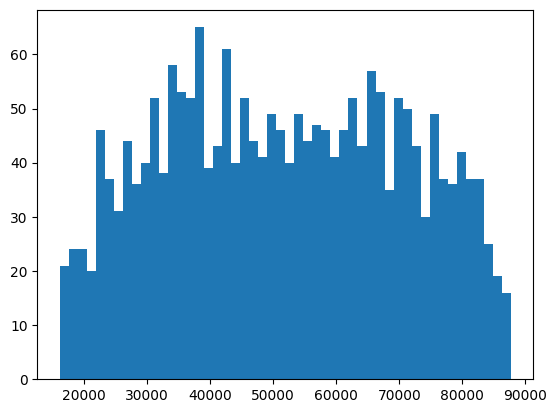

In [82]:
# Remove all outliers with respect to IQR (Inter Quartile Range) and plot
q1 = df['Income'].quantile(0.01)
q3 = df['Income'].quantile(0.99)
df_filtered = df[(df['Income'] < q3) & (df['Income'] > q1)]
plt.hist(df_filtered['Income'], bins=50)

<AxesSubplot:>

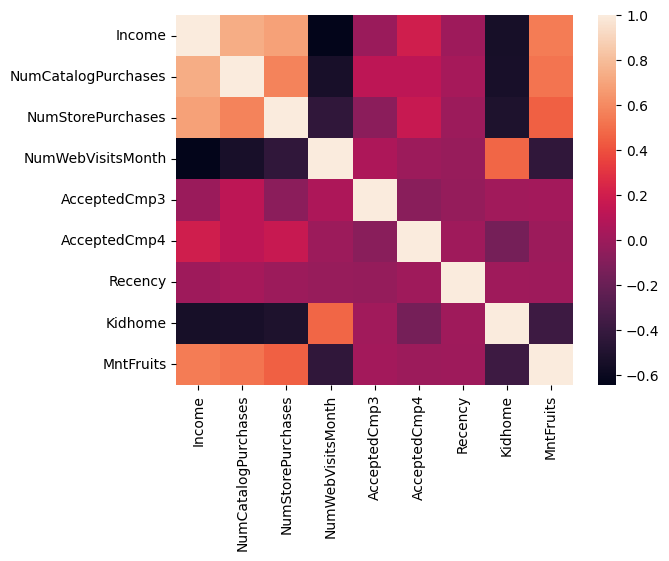

In [89]:
# Draw heat map correlation of dataset
well_data = df[['Income', 'NumCatalogPurchases',	'NumStorePurchases', 'NumWebVisitsMonth',
 'AcceptedCmp3', 'AcceptedCmp4', 'Recency','Kidhome', 'MntFruits']]
corr = well_data.corr()
sns.heatmap(corr)

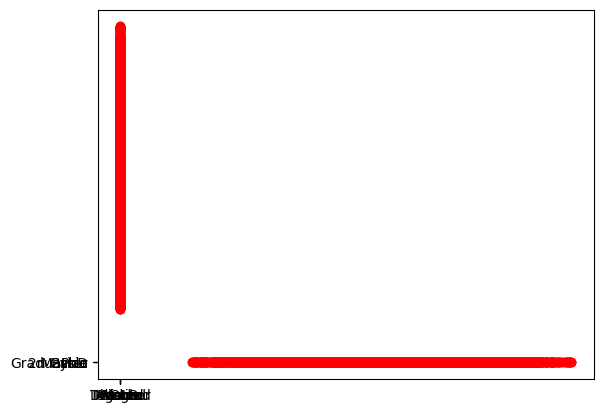

In [106]:
# Draw Income vs Education, Marital Status vs Income, Kidhome vs Income
plt.plot(df['Income'], df['Education'],'ro')
plt.plot(df['Marital_Status'], df['Income'],'ro')
plt.plot(df['Kidhome'], df['Income'],'ro')
plt.show()

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2126, dtype: int64


(array([  6.,   2.,   5.,  11.,  14.,  16.,  25.,  28.,  25.,  37.,  30.,
         37.,  39.,  42.,  37.,  38., 123.,  48.,  82.,  79.,  68.,  67.,
         77.,  82.,  71.,  67.,  51.,  44.,  49.,  73.,  41.,  43.,  44.,
         80.,  50.,  51.,  40.,  54.,  48.,  47.,  33.,  50.,  41.,  28.,
         29.,  19.,  15.,  16.,   7.,  13.]),
 array([26.  , 27.06, 28.12, 29.18, 30.24, 31.3 , 32.36, 33.42, 34.48,
        35.54, 36.6 , 37.66, 38.72, 39.78, 40.84, 41.9 , 42.96, 44.02,
        45.08, 46.14, 47.2 , 48.26, 49.32, 50.38, 51.44, 52.5 , 53.56,
        54.62, 55.68, 56.74, 57.8 , 58.86, 59.92, 60.98, 62.04, 63.1 ,
        64.16, 65.22, 66.28, 67.34, 68.4 , 69.46, 70.52, 71.58, 72.64,
        73.7 , 74.76, 75.82, 76.88, 77.94, 79.  ]),
 <BarContainer object of 50 artists>)

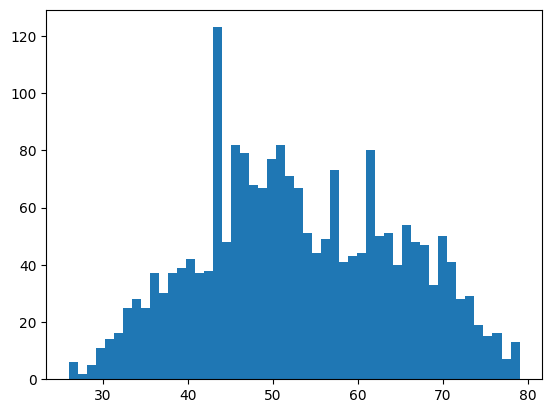

In [108]:
# Feature engineer Age column and calculate Age of customer and remove outliers and plot histogram of Age feature
df['Age'] = 2022 - df['Year_Birth']
print(df['Age'])
age_filtered = df[df['Age'] < 80 ]
plt.hist(age_filtered['Age'], bins=50)

In [110]:
# Create feature Kids = Kidhome + Teenhome
df['Kids'] = df['Kidhome'] + df['Teenhome']
print(df['Kids'])

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2126, dtype: int64


In [123]:
# Replace “Married” and “Together” with “Relationship”
df['Marital_Status'] = df['Marital_Status'].replace(['Married','Together'], 'Relationship')
print(df['Marital_Status'])

0             Single
1             Single
2       Relationship
3       Relationship
4       Relationship
            ...     
2235    Relationship
2236    Relationship
2237          Single
2238    Relationship
2239    Relationship
Name: Marital_Status, Length: 2126, dtype: object


In [124]:
# Replace “Divorced” and “Widow” with “Single”
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced','Widow'], 'Single')
print(df['Marital_Status'])

0             Single
1             Single
2       Relationship
3       Relationship
4       Relationship
            ...     
2235    Relationship
2236    Relationship
2237          Single
2238    Relationship
2239    Relationship
Name: Marital_Status, Length: 2126, dtype: object


In [132]:
# Replace “Single” with integer 1 and “Relationship” with integer 2 and put it in “Status” column
df['Status'] = df['Marital_Status'].map({'Single': 1, 'Relationship': 2})
print(df['Status'])

0       1.0
1       1.0
2       2.0
3       2.0
4       2.0
       ... 
2235    2.0
2236    2.0
2237    1.0
2238    2.0
2239    2.0
Name: Status, Length: 2126, dtype: float64


In [134]:
# Create column “Family Size” = “Status” + “Kids”
df['Family_Size'] = df['Status'] + df['Kids']
print(df['Family_Size'])

0       1.0
1       3.0
2       2.0
3       3.0
4       3.0
       ... 
2235    3.0
2236    5.0
2237    1.0
2238    3.0
2239    4.0
Name: Family_Size, Length: 2126, dtype: float64


In [137]:
# Create column “Expenses” which equals add the amount spent on each product 'MntWines', 'MntFruits', ‘MntMeatProducts','MntFishProducts', 'MntSweetProducts', ‘MntGoldProds’
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']  
print(df['Expenses'])

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Expenses, Length: 2126, dtype: int64


In [156]:
# Change “Dt_Customer” to pd.to_datetime and get min and max of date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m%d%y')
print('max is : {}'.format(np.max(df['Dt_Customer'] )))
print('min is : {}'.format(np.min(df['Dt_Customer'] )))

max is : 2014-12-06 00:00:00
min is : 2012-01-08 00:00:00


In [158]:
# Add column “Engaged_in_days” = Today - “Dt_Customer”
now = pd.Timestamp('now')
df['Engaged_in_days'] =  now - df['Dt_Customer']
print(df['Engaged_in_days'])

0      3875 days 00:05:08.545440
1      3029 days 00:05:08.545440
2      3376 days 00:05:08.545440
3      2969 days 00:05:08.545440
4      3225 days 00:05:08.545440
                  ...           
2235   3445 days 00:05:08.545440
2236   2965 days 00:05:08.545440
2237   3219 days 00:05:08.545440
2238   3220 days 00:05:08.545440
2239   3686 days 00:05:08.545440
Name: Engaged_in_days, Length: 2126, dtype: timedelta64[ns]


In [159]:
# Create “TotalAcceptedCmp” column which equals “AcceptedCmp1" +“AcceptedCmp2"
# + “AcceptedCmp3" + “AcceptedCmp4" + “AcceptedCmp5" + “Response"
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']  
print(df['TotalAcceptedCmp'])

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: TotalAcceptedCmp, Length: 2126, dtype: int64


In [180]:
# Create column “AmountPerPurchase” = “Expenses” / “NumTotalPurchases”  
df['NumTotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['AmountPerPurchase'] = df['Expenses'] / df['NumTotalPurchases'] 
print(df['AmountPerPurchase'])

0       64.680000
1        4.500000
2       36.952381
3        6.625000
4       22.210526
          ...    
2235    74.500000
2236    20.181818
2237    65.315789
2238    36.652174
2239    15.636364
Name: AmountPerPurchase, Length: 2126, dtype: float64


In [185]:
# Get “AmountPerPurchase”’s max value. What is wrong? Drop problematic rows and get a describe from “AmountPerPurchase”
df_filtered = df[df['AmountPerPurchase'] > 0]
print(np.max(df_filtered['AmountPerPurchase']))
df_filtered['AmountPerPurchase'].describe()

173.23076923076923


count    2126.000000
mean       32.126408
std        27.615442
min         2.000000
25%         9.814286
50%        23.363971
75%        43.828008
max       173.230769
Name: AmountPerPurchase, dtype: float64

In [188]:
# Fill missing values of “Income” column with the median of this feature
df['Income'] = df['Income'].fillna(df['Income'].median())
print(df['Income'])

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2126, dtype: float64


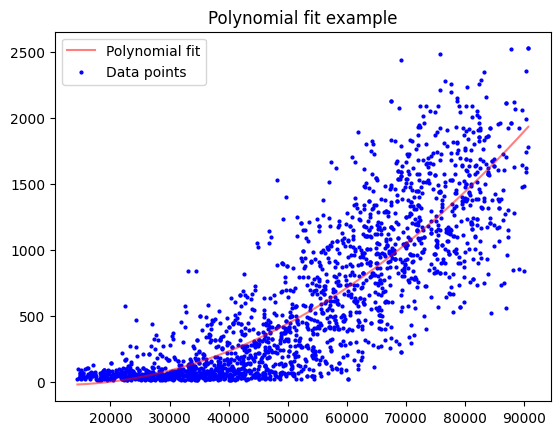

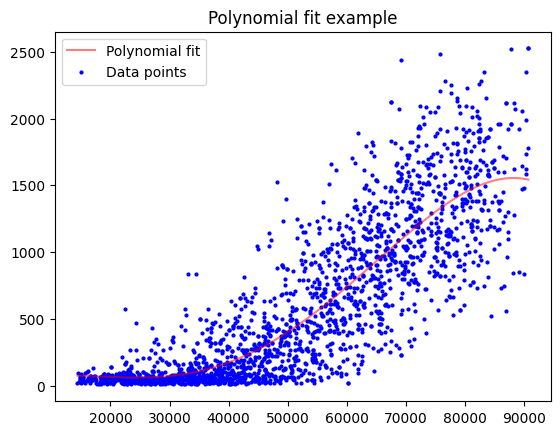

In [191]:
# Plot Income vs Expenses scatter plot and it a curve and return coeficients of itted curve

X_data = df['Income']
Y_data = df['Expenses']

a, b, c = np.polyfit(X_data, Y_data, 2)
fit_equation = lambda x: a * x ** 2 + b * x + c

def plot_fit(X, Y, f):
    X_fit = np.linspace(min(X), max(X), 1000)
    Y_fit = f(X_fit)

    fig, ax1 = plt.subplots()
    ax1.plot(X_fit, Y_fit, color='r', alpha=0.5, label='Polynomial fit')
    ax1.scatter(X, Y, s=4, color='b', label='Data points')
    ax1.set_title('Polynomial fit example')
    ax1.legend()
    plt.show()
    
plot_fit(X_data, Y_data, fit_equation)
a, b, c, d, e = np.polyfit(X_data, Y_data, 4)
fit_equation = lambda x: a * x**4 + b * x**3 + c * x**2 + d * x + e
    
plot_fit(X_data, Y_data, fit_equation)

In [193]:
# Print transpose of data frame
df_T = df.T
print(df_T)

                                          0                          1     \
Year_Birth                                1957                       1954   
Education                           Graduation                 Graduation   
Marital_Status                          Single                     Single   
Income                                 58138.0                    46344.0   
Kidhome                                      0                          1   
Teenhome                                     0                          1   
Dt_Customer                2012-04-09 00:00:00        2014-08-03 00:00:00   
Recency                                     58                         38   
MntWines                                   635                         11   
MntFruits                                   88                          1   
MntMeatProducts                            546                          6   
MntFishProducts                            172                          2   

# sara sadat nasr